In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [2]:
def add(climate_data, url, name):
    data_city= pd.read_table(url, delim_whitespace=True, names=('Month', 'Day', 'Year', name))
    d1=data_city[['Month', 'Day', 'Year']]                       
    data_city['Date']=pd.to_datetime(d1)
    data_city=data_city[['Date',name]]
    climate_data=climate_data.merge(data_city, on = 'Date')
    return climate_data

In [3]:
N='AK_Anchorage_Temp'
url_1='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/AKANCHOR.txt'
data_Anchorage = pd.read_table(url_1, delim_whitespace=True, names=('Month', 'Day', 'Year', N))
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp
0,1,1,1995,23.2
1,1,2,1995,27.6
2,1,3,1995,32.0
3,1,4,1995,29.3
4,1,5,1995,30.1


In [4]:
data_Anchorage.shape

(9265, 4)

In [5]:
date1=data_Anchorage[['Month', 'Day', 'Year']]

In [6]:
data_Anchorage['Date']=pd.to_datetime(date1)

In [7]:
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp,Date
0,1,1,1995,23.2,1995-01-01
1,1,2,1995,27.6,1995-01-02
2,1,3,1995,32.0,1995-01-03
3,1,4,1995,29.3,1995-01-04
4,1,5,1995,30.1,1995-01-05


In [8]:
data_Anchorage=data_Anchorage[['Date','AK_Anchorage_Temp' ]]
climate_data=data_Anchorage

In [9]:
url_2='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/NDFARGO.txt'
climate_data=add(climate_data,url_2, 'ND_Fargo_Temp')

In [10]:
city_list=[['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/FLWPALMB.txt', 'FL_West_Palm_Beach_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/VTBURLIN.txt', 'Vermont_Burlington_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/TXELPASO.txt', 'TX_El_Paso_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WYCHEYEN.txt', 'Wyoming_Cheyenne_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/CASANFRA.txt','San_Francisco_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/OHCLEVEL.txt','Cleveland_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WIMILWAU.txt','Milwaukee_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/NYNEWYOR.txt','New_York_City'], 
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/HIHONOLU.txt', 'Honolulu_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/EGCAIRO.txt', 'Egypt_Cairo'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/INDELHI.txt','India_Delhi'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/CIBIEJNG.txt','China_Beijing'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/SRSINGAP.txt','Singapore_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/NZACKLND.txt', 'New_Zealand Auckland'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/RSMOSCOW.txt', 'Russia_Moscow'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/AGBUENOS.txt', 'Argentina Buenos_Aires'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/PRLIMA.txt','Peru_Lima']]


In [11]:
#Read files from the website
for url in city_list:
    climate_data=add(climate_data, url[0], url[1])
climate_data.shape

(7627, 20)

In [12]:
climate_data=climate_data.set_index(['Date'])
climate_data.head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,
1995-01-01,23.2,5.2,69.7,31.0,39.9,8.8,46.7,39.9,23.8,44.0,71.3,59.2,50.7,28.0,81.1,63.6,32.3,82.4,73.1
1995-01-02,27.6,10.1,68.7,30.1,37.0,19.0,47.3,23.5,14.5,41.8,72.5,57.5,52.1,29.0,81.7,63.8,31.7,75.1,74.0
1995-01-03,32.0,-3.8,68.9,25.9,41.3,11.3,49.6,21.4,15.5,28.1,73.2,57.4,53.8,29.9,82.4,59.2,26.8,73.7,73.6
1995-01-04,29.3,-6.3,68.0,23.1,40.1,5.0,50.0,15.2,3.9,31.7,71.9,59.3,53.7,34.5,82.6,61.2,15.9,77.1,74.5
1995-01-05,30.1,8.4,64.5,12.0,40.9,18.9,50.8,10.5,6.1,21.3,70.4,58.8,54.5,36.6,82.4,64.0,23.8,79.5,73.4


In [13]:
climate_data[climate_data.AK_Anchorage_Temp==-99]

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,
1998-12-24,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-25,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-30,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1998-12-31,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1999-01-10,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2002-06-18,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2002-06-19,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2002-06-20,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
2002-06-21,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [14]:
# Replace the outliers in the temperature data
climate_data=climate_data.replace(-99, np.nan)

In [15]:
climate_data.isnull().sum()

AK_Anchorage_Temp          13
ND_Fargo_Temp              25
FL_West_Palm_Beach_Temp    25
Vermont_Burlington_Temp    22
TX_El_Paso_Temp            19
Wyoming_Cheyenne_Temp      16
San_Francisco_Temp         36
Cleveland_Temp             14
Milwaukee_Temp             55
New_York_City              20
Honolulu_Temp              18
Egypt_Cairo                20
India_Delhi                36
China_Beijing              13
Singapore_Temp             14
New_Zealand Auckland       43
Russia_Moscow              14
Argentina Buenos_Aires     19
Peru_Lima                  21
dtype: int64

In [16]:
# Use the linear method fill the null.
climate_data.interpolate(method='linear', inplace=True)
climate_data.isnull().sum()

AK_Anchorage_Temp          0
ND_Fargo_Temp              0
FL_West_Palm_Beach_Temp    0
Vermont_Burlington_Temp    0
TX_El_Paso_Temp            0
Wyoming_Cheyenne_Temp      0
San_Francisco_Temp         0
Cleveland_Temp             0
Milwaukee_Temp             0
New_York_City              0
Honolulu_Temp              0
Egypt_Cairo                0
India_Delhi                0
China_Beijing              0
Singapore_Temp             0
New_Zealand Auckland       0
Russia_Moscow              0
Argentina Buenos_Aires     0
Peru_Lima                  0
dtype: int64

In [17]:
climate_data.loc['1998-12-24':'1998-12-31']

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,
1998-12-24,13.033333,2.600000,73.333333,17.166667,34.600000,8.166667,39.900000,16.866667,16.0,26.366667,74.266667,57.966667,53.5,34.866667,77.533333,66.033333,12.600000,74.833333,69.266667
1998-12-25,10.966667,2.300000,71.666667,21.833333,37.100000,21.133333,41.500000,21.633333,20.0,28.433333,74.433333,57.133333,52.6,32.733333,78.166667,65.966667,18.800000,78.666667,70.333333
1998-12-26,8.900000,2.000000,70.000000,26.500000,39.600000,34.100000,43.100000,26.400000,24.0,30.500000,74.600000,56.300000,51.7,30.600000,78.800000,65.900000,25.000000,82.500000,71.400000
1998-12-27,3.100000,14.500000,70.800000,26.600000,48.200000,34.900000,45.900000,30.100000,30.5,33.400000,72.000000,57.000000,51.4,34.800000,76.100000,66.400000,32.200000,83.500000,70.000000
1998-12-28,15.300000,14.600000,73.000000,34.800000,48.200000,39.600000,43.800000,34.800000,27.0,40.800000,71.400000,60.000000,49.5,31.000000,77.800000,68.300000,35.600000,72.900000,69.400000
1998-12-29,17.200000,-0.800000,68.900000,26.900000,48.300000,37.600000,43.500000,33.900000,32.3,39.000000,73.300000,56.100000,57.6,28.600000,75.700000,68.200000,36.300000,65.400000,67.900000
1998-12-30,17.300000,-2.566667,68.033333,20.833333,50.333333,36.000000,44.966667,27.466667,24.3,34.633333,72.966667,57.100000,56.5,28.000000,76.533333,68.100000,30.233333,67.500000,68.733333
1998-12-31,17.400000,-4.333333,67.166667,14.766667,52.366667,34.400000,46.433333,21.033333,16.3,30.266667,72.633333,58.100000,55.4,27.400000,77.366667,68.000000,24.166667,69.600000,69.566667


In [18]:
# calculate the monthly average temperature of each city.
climate_m=climate_data.groupby(pd.DatetimeIndex(climate_data.index).to_period('M')).mean()
climate_m

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,New_York_City,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,,
1995-01,16.261290,11.283871,63.751613,28.219355,46.709677,29.890323,51.890323,30.325806,24.996774,37.829032,73.606452,56.600000,55.548387,30.100000,80.351613,67.016129,19.796774,73.351613,74.780645
1995-02,21.246429,13.082143,64.850000,19.696429,56.246429,32.875000,53.146429,26.860714,25.703571,31.985714,73.017857,59.485714,62.367857,35.642857,79.692857,68.175000,28.796429,71.182143,74.650000
1995-03,18.525806,28.377419,71.412903,35.119355,60.416129,37.090323,53.638710,40.561290,37.870968,44.370968,74.961290,64.477419,70.541935,45.835484,81.761290,65.693548,31.690323,69.745161,73.100000
1995-04,40.026667,38.523333,75.426667,40.633333,65.646667,39.253333,54.273333,46.496667,43.356667,51.003333,75.420000,67.040000,83.113333,58.256667,82.440000,64.196667,46.906667,62.100000,68.253333
1995-05,48.625806,55.212903,80.658065,56.545161,75.848387,44.945161,55.383871,59.435484,57.254839,61.529032,77.477419,74.177419,93.187097,67.667742,83.500000,57.506452,56.548387,55.632258,66.319355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07,61.941935,72.712903,82.587097,71.616129,84.041935,67.558065,64.912903,71.777419,70.570968,78.483871,82.719355,84.019355,86.835484,79.941935,84.380645,51.070968,64.119355,52.370968,66.025806
2015-08,59.177419,69.780645,82.141935,72.151613,85.361290,68.825806,66.193548,70.951613,69.987097,78.787097,82.767742,87.822581,86.819355,78.380645,83.200000,52.519355,63.454839,57.025806,64.648387
2015-09,47.060000,65.633333,81.220000,66.736667,80.890000,64.170000,65.263333,68.650000,67.516667,73.540000,83.090000,85.583333,87.213333,68.723333,83.790000,54.346667,56.600000,55.730000,65.640000


In [19]:
# Found a 1869-2020 temperature data of central park of New York City at  https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf
NY_Temp=pd.read_excel('NY-temp-converted.xlsx')

In [20]:
NY_Temp=NY_Temp.drop(['Unnamed: 13', 'Unnamed: 14'], axis=1)
NY_Temp.dropna(axis=0, inplace=True)

In [21]:
NY_Temp

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7
3,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1
4,1871,28.3,30.2,44.2,52,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2
5,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2015,29.9,23.9,38.1,54.3,68.5,71.2,78.8,79,74.5,58,52.8,50.8
162,2016,34.5,37.7,48.9,53.3,62.8,72.3,78.7,79.2,71.8,58.8,49.8,38.3
163,2017,38,41.6,39.2,57.2,61.1,72,76.8,74,70.5,64.1,46.6,33.4
164,2018,31.7,42,40.1,49.5,66.9,71.7,77.6,78.1,70.7,57.7,44.4,40.1


In [22]:
NY_Temp=NY_Temp.drop(index=0)
NY_Temp

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7
3,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1
4,1871,28.3,30.2,44.2,52,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2
5,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41,26.7
6,1873,28.6,29.5,35.7,46.7,58.8,70.3,75.4,72,65.4,55.8,37,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2015,29.9,23.9,38.1,54.3,68.5,71.2,78.8,79,74.5,58,52.8,50.8
162,2016,34.5,37.7,48.9,53.3,62.8,72.3,78.7,79.2,71.8,58.8,49.8,38.3
163,2017,38,41.6,39.2,57.2,61.1,72,76.8,74,70.5,64.1,46.6,33.4
164,2018,31.7,42,40.1,49.5,66.9,71.7,77.6,78.1,70.7,57.7,44.4,40.1


In [23]:
NY_Temp.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 1':1, 'Unnamed: 2':2, 'Unnamed: 3':3, 'Unnamed: 4':4, 'Unnamed: 5':5, 'Unnamed: 6':6, 'Unnamed: 7':7, 'Unnamed: 8':8, 'Unnamed: 9':9, 'Unnamed: 10':10, 'Unnamed: 11':11, 'Unnamed: 12':12}, inplace=True)
NY_Temp

,Year,1,2,3,4,5,6,7,8,9,10,11,12
1,1869,35.1,34.5,34.8,49.2,57.7,69.3,72.8,71.8,65.6,50.9,40.3,34.7
3,1870,37.5,31.3,34.1,50.7,60.9,72.9,76.6,75.3,67.6,56.7,45.5,34.1
4,1871,28.3,30.2,44.2,52,60.4,68.2,72.3,73.6,60.8,55.6,38.8,29.2
5,1872,28.8,29.9,30.5,49.4,61.5,71.2,77.5,75.6,66.4,53.2,41,26.7
6,1873,28.6,29.5,35.7,46.7,58.8,70.3,75.4,72,65.4,55.8,37,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2015,29.9,23.9,38.1,54.3,68.5,71.2,78.8,79,74.5,58,52.8,50.8
162,2016,34.5,37.7,48.9,53.3,62.8,72.3,78.7,79.2,71.8,58.8,49.8,38.3
163,2017,38,41.6,39.2,57.2,61.1,72,76.8,74,70.5,64.1,46.6,33.4
164,2018,31.7,42,40.1,49.5,66.9,71.7,77.6,78.1,70.7,57.7,44.4,40.1


In [24]:
NY_Temp=NY_Temp.melt(id_vars=['Year'],value_name='NYTemp' )
NY_Temp.dtypes

Year        object
variable    object
NYTemp      object
dtype: object

In [25]:
NY_Temp.rename(columns={'variable':'month'}, inplace=True)
NY_Temp['day']=1
NY_Temp

,Year,month,NYTemp,day
0,1869,1,35.1,1
1,1870,1,37.5,1
2,1871,1,28.3,1
3,1872,1,28.8,1
4,1873,1,28.6,1
...,...,...,...,...
1807,2015,12,50.8,1
1808,2016,12,38.3,1
1809,2017,12,33.4,1
1810,2018,12,40.1,1


In [26]:
NY_Temp['Date']=pd.to_datetime(NY_Temp[['month','day','Year']])
NY_Temp['NYTemp']=NY_Temp['NYTemp'].astype(float)

In [27]:
NY_Temp=NY_Temp[['Date', 'NYTemp']]
NY_Temp=NY_Temp.set_index('Date')


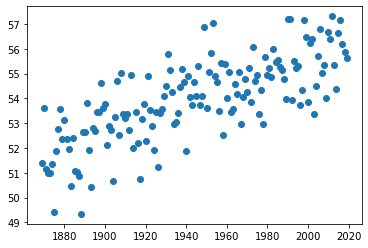

In [37]:
NY_Temp=NY_Temp.sort_index(axis=0,ascending=True)
NY_Y=NY_Temp.groupby(pd.DatetimeIndex(NY_Temp.index).to_period('Y')).mean()
NY_Y.index=NY_Y.index.to_timestamp()
plt.scatter(NY_Y.index, NY_Y['NYTemp']);

In [ ]:
climate_m=climate_data.groupby(pd.DatetimeIndex(climate_data.index).to_period('M')).mean()

In [ ]:
NYC_Temp20=NY_Temp.loc['1995-01-01':'2014-12-01']

In [ ]:
climate_m.index=climate_m.index.to_timestamp()
climate_m=climate_m.loc['1995-01-01':'2014-12-01']
climate_m.head()

In [ ]:
NYC_Temp20=NYC_Temp20.merge(climate_m[['New_York_City']], on='Date')

In [ ]:
# Compare the 2 climate dataset of New York City (NYTemp: 1869-2020 data, New_York_City: 1995-2014 data)

NYC_Temp20

In [ ]:
NYC_Temp20.describe()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(NYC_Temp20.index,NYC_Temp20['NYTemp'], c='r', label='NY Central Park')
plt.plot(NYC_Temp20.index,NYC_Temp20['New_York_City'], c ='b', label="New York City")
plt.show()
#There is some slight difference bewteen 2 NYC temperature datasets.

In [ ]:
NYC_m=climate_m[['Vermont_Burlington_Temp', 'Cleveland_Temp','New_York_City']]
NYC_m

In [ ]:
NYC_m['Month']= pd.DatetimeIndex(NYC_m.index).month
NYC_m

In [ ]:
NYC_m['Month']=NYC_m['Month'].astype('str')

In [ ]:
NYC_m.dtypes

In [ ]:
X=NYC_m[['Vermont_Burlington_Temp','Cleveland_Temp','Month']]
X=dummy=pd.get_dummies(X)
X

In [ ]:
y=NYC_m['New_York_City']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [ ]:
scaler =StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled